# 十月算法班第二讲：线性代数与矩阵论

In [313]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import copy
import pdb
from random import random
%matplotlib inline  

## 线性变换图示

In [314]:
"""准备初始图形"""
num_poits = 250
chunksize = 50
shape = pd.DataFrame({'ind':range(num_poits)})
shape['x'] = shape.ind.apply(lambda x: (x%chunksize)*1.0/chunksize)
shape['y'] = shape.ind.apply(lambda x: (x/chunksize)/(num_poits*1.0/chunksize-1))
shape_re = shape.copy()
shape_re['x'] = shape['y']
shape_re['y'] = shape['x']
shape = shape.append(shape_re)
shape['x'] -= 0.2
shape['y'] -= 0.2

shape.drop('ind', axis=1, inplace=True)



(-1, 1.5)

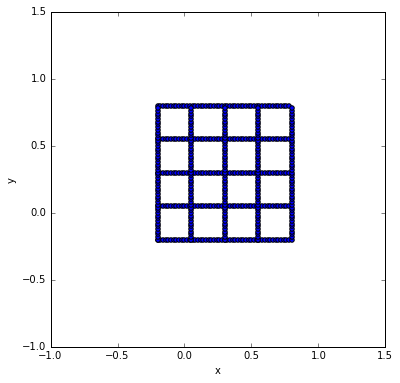

In [315]:
"""初始图形Plot"""
shape.plot(x='x', y='y', figsize=[6,6], kind = 'scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


In [316]:
"""线性变换矩阵"""
pi=np.pi
rotation = pd.DataFrame(np.array([[np.cos(pi/4), np.sin(pi/4)],[-np.sin(pi/4), np.cos(pi/4)]])
                       , index = ['x','y'], columns = ['x','y'])
stretch_x = pd.DataFrame(np.array([[1.5, 0],[0, 1]])
                       , index = ['x','y'], columns = ['x','y'])
stretch_y = pd.DataFrame(np.array([[1, 0],[0, 1.5]])
                       , index = ['x','y'], columns = ['x','y'])
flip_y = pd.DataFrame(np.array([[1, 0],[0, -1]])
                       , index = ['x','y'], columns = ['x','y'])


(-1, 1.5)

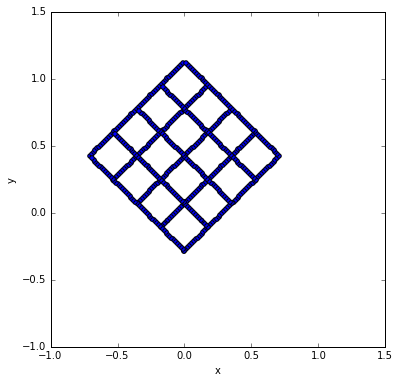

In [317]:
"""旋转"""
shape.dot(rotation).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


(-1, 1.5)

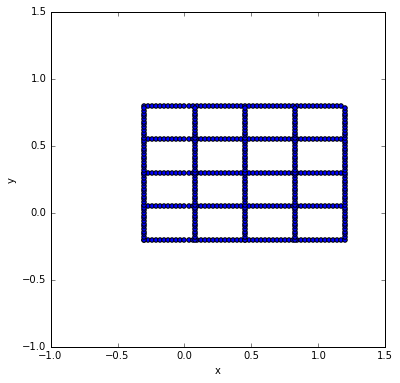

In [318]:
"""x拉伸"""
shape.dot(stretch_x).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


(-1, 1.5)

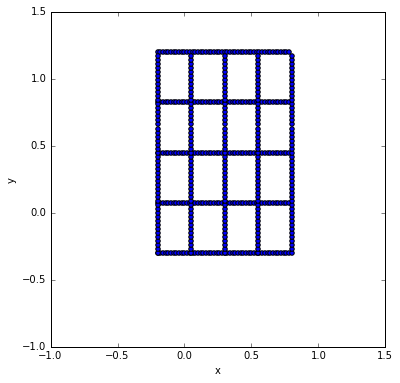

In [145]:
"""y拉伸"""
shape.dot(stretch_y).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


(-1, 1.5)

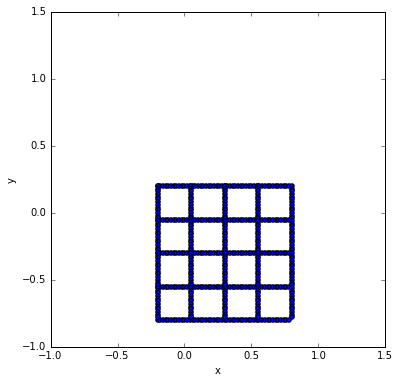

In [319]:
"""y反转"""
shape.dot(flip_y).plot(x='x', y='y', figsize=[6,6], kind='scatter')
plt.xlim([-1,1.5])
plt.ylim([-1,1.5])


## 斐波那契数列

In [207]:
"""利用纯粹递归计算斐波那契数列"""
def arrayComputer(n):
    if n <= 2:
        return 1
    else:
        prevA = arrayComputer(n-1)
        prevprevA = arrayComputer(n-2)
        return prevA + prevprevA

In [202]:
print "直接递归算法时间复杂度\n"
print "",
for n in range(1,30):
    %time print "第%2.d个斐波那契数为： %7.d, \所用时间为 "%(n,arrayComputer(n)),

直接递归算法时间复杂度

 第 1个斐波那契数为：       1, \所用时间为 Wall time: 0 ns
 第 2个斐波那契数为：       1, \所用时间为 Wall time: 0 ns
 第 3个斐波那契数为：       2, \所用时间为 Wall time: 0 ns
 第 4个斐波那契数为：       3, \所用时间为 Wall time: 0 ns
 第 5个斐波那契数为：       5, \所用时间为 Wall time: 0 ns
 第 6个斐波那契数为：       8, \所用时间为 Wall time: 0 ns
 第 7个斐波那契数为：      13, \所用时间为 Wall time: 0 ns
 第 8个斐波那契数为：      21, \所用时间为 Wall time: 0 ns
 第 9个斐波那契数为：      34, \所用时间为 Wall time: 0 ns
 第10个斐波那契数为：      55, \所用时间为 Wall time: 0 ns
 第11个斐波那契数为：      89, \所用时间为 Wall time: 0 ns
 第12个斐波那契数为：     144, \所用时间为 Wall time: 0 ns
 第13个斐波那契数为：     233, \所用时间为 Wall time: 0 ns
 第14个斐波那契数为：     377, \所用时间为 Wall time: 0 ns
 第15个斐波那契数为：     610, \所用时间为 Wall time: 0 ns
 第16个斐波那契数为：     987, \所用时间为 Wall time: 0 ns
 第17个斐波那契数为：    1597, \所用时间为 Wall time: 0 ns
 第18个斐波那契数为：    2584, \所用时间为 Wall time: 1e+03 µs
 第19个斐波那契数为：    4181, \所用时间为 Wall time: 3 ms
 第20个斐波那契数为：    6765, \所用时间为 Wall time: 4 ms
 第21个斐波那契数为：   10946, \所用时间为 Wall time: 5 ms
 第22个斐波那契数为：   17711, \所用时间为 Wall time

In [205]:
"""利用线性模型计算斐波那契数列"""
def linearComputer(n):
    if n <= 2:
        return 1    
    current2A = [1, 1]
    prev2A = copy.deepcopy(current2A)
    for ind in range(n-2):
        current2A[0] = 0*prev2A[0] + 1*prev2A[1]
        current2A[1] = 1*prev2A[0] + 1*prev2A[1]
        prev2A = copy.deepcopy(current2A)
    return prev2A[1]

In [206]:
print "线性模型算法时间复杂度\n"
print "",
for n in range(1,300):
    %time print "第%2.d个斐波那契数为： %7.d, \所用时间为 "%(n,linearComputer(n)),

线性模型算法时间复杂度

 第 1个斐波那契数为：       1, \所用时间为 Wall time: 0 ns
 第 2个斐波那契数为：       1, \所用时间为 Wall time: 0 ns
 第 3个斐波那契数为：       2, \所用时间为 Wall time: 0 ns
 第 4个斐波那契数为：       3, \所用时间为 Wall time: 0 ns
 第 5个斐波那契数为：       5, \所用时间为 Wall time: 0 ns
 第 6个斐波那契数为：       8, \所用时间为 Wall time: 0 ns
 第 7个斐波那契数为：      13, \所用时间为 Wall time: 0 ns
 第 8个斐波那契数为：      21, \所用时间为 Wall time: 0 ns
 第 9个斐波那契数为：      34, \所用时间为 Wall time: 0 ns
 第10个斐波那契数为：      55, \所用时间为 Wall time: 1e+03 µs
 第11个斐波那契数为：      89, \所用时间为 Wall time: 0 ns
 第12个斐波那契数为：     144, \所用时间为 Wall time: 0 ns
 第13个斐波那契数为：     233, \所用时间为 Wall time: 0 ns
 第14个斐波那契数为：     377, \所用时间为 Wall time: 0 ns
 第15个斐波那契数为：     610, \所用时间为 Wall time: 1 ms
 第16个斐波那契数为：     987, \所用时间为 Wall time: 0 ns
 第17个斐波那契数为：    1597, \所用时间为 Wall time: 0 ns
 第18个斐波那契数为：    2584, \所用时间为 Wall time: 1 ms
 第19个斐波那契数为：    4181, \所用时间为 Wall time: 1e+03 µs
 第20个斐波那契数为：    6765, \所用时间为 Wall time: 0 ns
 第21个斐波那契数为：   10946, \所用时间为 Wall time: 0 ns
 第22个斐波那契数为：   17711, \所用时间为 Wall 

## 线性回归

In [327]:
"""准备数据集X,Y"""
a=1
b=0.2
c=0.3
ind = np.array(range(10))
X = np.array([[1,1,i] for i in range(10)])
X[:,1] = ind**2
X[:,2] = np.tan(ind)

Y = a*X[:,0] + b*X[:,1] + c*X[:,2] + np.random.rand(1,10)

df = pd.DataFrame(X,columns=['x%d'%key_ind for key_ind in range(3)])
df['y'] = Y.T

In [328]:
"""准备线性模型"""
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression(fit_intercept=False)
from sklearn.linear_model import Lasso
lasso_clf = Lasso(fit_intercept=False)
from sklearn.linear_model import LogisticRegression
LR_clf = LogisticRegression(fit_intercept=False)

In [329]:
"""线性回归"""
lr_clf.fit(X,Y.T)
lr_clf.coef_

array([[ 1.52118056,  0.19664534,  0.28310428]])

In [330]:
"""Lasso 线性回归"""
lasso_clf.fit(X,Y.T)
lasso_clf.coef_

array([ 0.        ,  0.21595921,  0.        ])

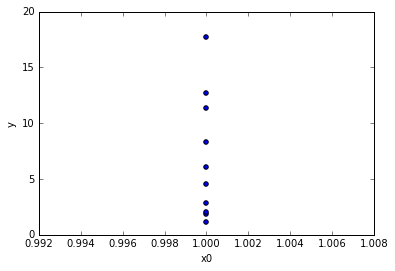

In [326]:
df.plot(x='x0',y='y',kind='scatter')